# **Solving PDEs**
---

## **1. Heat Equation (Diffusion)**

We are coding a heat equation with sine initial condition and Dirichlet boundaries:

$$
u_t = Du_{xx}, \; x \in [0,1], \; t > 0
$$

- Models heat spreading.
- Exact solution: Gaussian spreads out.
- Tests second derivative discretization.

Initial condition: $u(x,0) = sin(\pi x)$.$\newline$
Boundary: $u(0,t) = u(1,t) = 0$

The exact solution is:
$$
u(x,t) = e^{-D\pi^2t}sin(\pi x)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 1.0
nx = 51
dx = L / (nx-1)
D = 0.1
dt = 0.0005
nt = 500

In [3]:
assert D*dt/dx**2 < 0.5, "dt too large, unstable scheme"

In [4]:
x = np.linspace(0, L, nx)
u = np.sin(np.pi * x)
u[0] = 0
u[-1] = 0

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + D*dt/dx**2 * (un[i+1] - 2*un[i] + un[i-1])

u_exact = np.exp(-D * (np.pi**2) * nt*dt) * np.sin(np.pi * x)

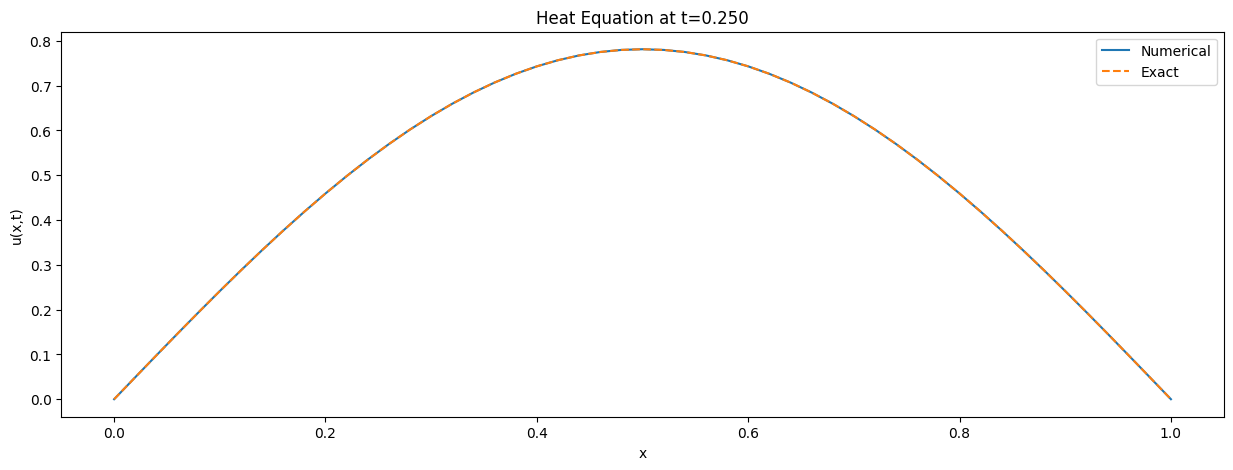

In [5]:
plt.figure(figsize=(15,5))
plt.plot(x, u, label='Numerical')
plt.plot(x, u_exact, '--', label='Exact')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Heat Equation at t={nt*dt:.3f}')
plt.legend()
plt.show()

---